<a href="https://colab.research.google.com/github/zekzen/dataclub/blob/main/5_regression_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# -*- coding: utf-8 -*-
"""
İU Data Klubu - Yapay Sinir Aglari Sunumu
07.04.2021
Author: Dr. Zeki Ozen

Kod Linki: https://www.datatechnotes.com/2019/01/regression-example-with-keras-in-python.html


"""

'\nİU Data Klubu - Yapay Sinir Aglari Sunumu\n07.04.2021\nAuthor: Dr. Zeki Ozen\n\nKod Linki: https://www.datatechnotes.com/2019/01/regression-example-with-keras-in-python.html\n\n\n'

In [1]:
# gerekli kutuphaneleri calisma ortamimiza dahil ediyoruz
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# y = (ax1 + bx2 + cx3/2)/3 seklinde bir amac fonksiyonumuz olsun
# bu amac fonksiyonu asagidaki gibi bir
# python fonksiyonla olusturalim
random.seed(123)
def CreateDataset(N):
 x1,x2,x3,y = [],[],[],[]
 for i in range(N):    
  aa = i/10+random.uniform(-4,3)
  bb = i/30+random.uniform(-4,4)
  cc = i/40+random.uniform(-3,3)-5
  yy = (aa+bb+cc/2)/3
  x1.append([aa])
  x2.append([bb])
  x3.append([cc])
  y.append([yy])
 return np.hstack([x1,x2,x3]), np.array(y)

In [3]:
# ornek sayimiz 200 olsun
N = 200

In [4]:
# yukarida olusturdugumuz fonksiyonla 200 ornekle veri setimizi olusturalim
x,y = CreateDataset(N)
x_ax = range(N)
print(x_ax)

range(0, 200)


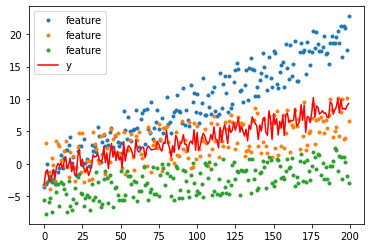

In [5]:
# veri setimizde x1, x2 ve x3 niteliklerinin sacilimini (mavi, turuncu, yesil renkli noktalar) 
# kırmızı egri de ciktiyi verecek sekilde grafige aktaralim
plt.plot(x_ax, x, 'o', label="feature", markersize=3)
plt.plot(x_ax, y, lw=1.5, color="red", label="y")
plt.legend()
plt.show()

In [6]:
# simdi hesaplama yapacak YSA modelimizi kuralim
def BuildModel():
 model = Sequential()
 model.add(Dense(128, input_dim=3,activation='relu')) 
 model.add(Dense(32, activation='relu')) 
 model.add(Dense(8,activation='relu')) 
 model.add(Dense(1,activation='linear'))
 model.compile(loss="mean_squared_error", optimizer="adam")   
 #model.compile(loss="mean_absolute_error", optimizer="adam") 
 return model

In [7]:
# modelimizin ozetini ciktilayalim
BuildModel().summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 4,913
Trainable params: 4,913
Non-trainable params: 0
_________________________________________________________________


In [8]:
# regresyon yapacagimiz icin Keras kutuphanesinden KerasRegressor fonksiyonunu kullanalim
regressor = KerasRegressor(build_fn=BuildModel, nb_epoch=100, batch_size=4)

In [9]:
# modelimizi egitelim
regressor.fit(x,y) 

67/67 [==============================] - 1s 1ms/step - loss: 2.5282


In [10]:
# egittigimiz modele test veritini vererek basarimini sinayalim
y_pred1 = regressor.predict(x)
error_mse1 = mean_squared_error(y, y_pred1)
print(error_mse1)

0.02643770622242664


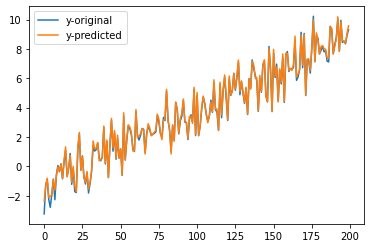

In [11]:
# cikti degerleri ve gercek degerleri grafik uzerinde gosterelim
plt.plot(y, label="y-original")
plt.plot(y_pred1, label="y-predicted")
plt.legend()
plt.show()

In [12]:
# simdi modelimizi KerasRegressor sinifi kullanmadan egitelim
model = BuildModel()
model.fit(x, y, epochs=100, verbose=False, shuffle=False)
y_pred2 = model.predict(x)
error_mse2=mean_squared_error(y, y_pred2)
print(error_mse2)

0.001273402745422095


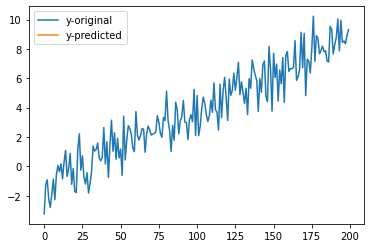

In [13]:
# cikti degerleri ve gercek degerleri grafik uzerinde gosterelim
plt.plot(y, label="y-original")
plt.plot(error_mse2, label="y-predicted")
plt.legend()
plt.show()